# BPE(Byte Pair Encoding, 바이트 페어 인코딩)
* 문장 혹은 단어 안에 있는 글자들을 적절한 단위로 나누는 Subword Tokenizer 의 하나
* Token들의 빈도를 기반으로 높은 빈도의 토큰들을 merge 해가며 최종 Token을 만들어 내는 방법
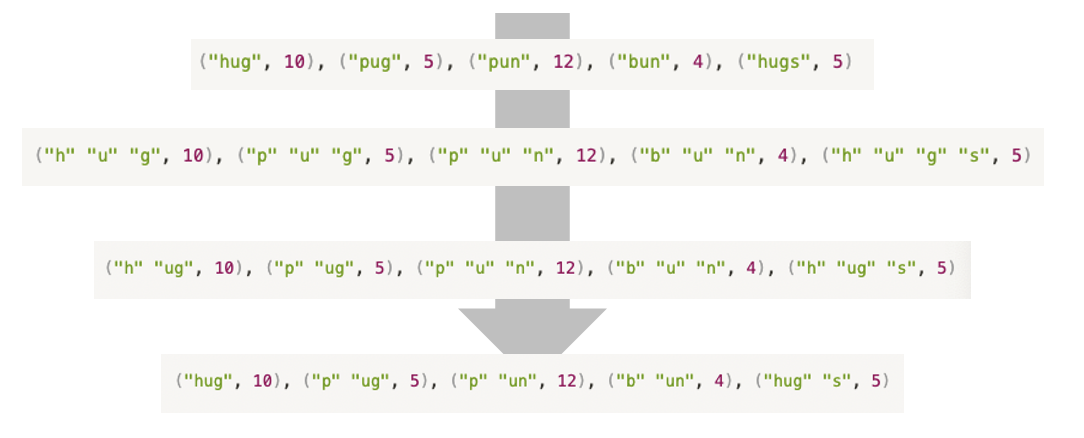

In [2]:
w1 = ["hug"]
w2 = ["pug"]
w3 = ["pun"]
w4 = ["bun"]
w5 = ["hugs"]

In [3]:
word_freq_1 = {
    "w1": 10,
    "w2": 5,
    "w3": 12,
    "w4": 4,
    "w5": 5
}

# "hug": 10번
# "pug": 5번
# "pun": 12번
# "bun": 4번
# "hugs": 5번

### Step 1.
* 형태소(글자, character) 수준으로 분리

In [4]:
w1 = list(w1[0])
w2 = list(w2[0])
w3 = list(w3[0])
w4 = list(w4[0])
w5 = list(w5[0])

print(f"w1 : {w1}")
print(f"w2 : {w2}")
print(f"w3 : {w3}")
print(f"w4 : {w4}")
print(f"w5 : {w5}")

w1 : ['h', 'u', 'g']
w2 : ['p', 'u', 'g']
w3 : ['p', 'u', 'n']
w4 : ['b', 'u', 'n']
w5 : ['h', 'u', 'g', 's']


In [5]:
first_voca = list(set(w1 + w2 + w3 + w4 + w5))

print(first_voca)

['h', 'b', 'g', 'p', 's', 'u', 'n']


In [6]:
print(f"{w1}의 freq: {word_freq_1['w1']}")
print(f"{w2}의 freq: {word_freq_1['w2']}")
print(f"{w3}의 freq: {word_freq_1['w3']}")
print(f"{w4}의 freq: {word_freq_1['w4']}")
print(f"{w5}의 freq: {word_freq_1['w5']}")

['h', 'u', 'g']의 freq: 10
['p', 'u', 'g']의 freq: 5
['p', 'u', 'n']의 freq: 12
['b', 'u', 'n']의 freq: 4
['h', 'u', 'g', 's']의 freq: 5


### Step 2.
* 연속한 pair를 만들고 각각의 빈도를 탐색

In [7]:
w1_pair = ["hu", "ug"]
w2_pair = ["pu", "ug"]
w3_pair = ["pu", "un"]
w4_pair = ["bu", "un"]
w5_pair = ["hu", "ug", "gs"]

In [8]:
word_freq_2 = {
    "hu": word_freq_1["w1"] + word_freq_1["w5"],
    "ug": word_freq_1["w1"] + word_freq_1["w2"] + word_freq_1["w5"],
    "pu": word_freq_1["w2"] + word_freq_1["w3"],
    "un": word_freq_1["w3"] + word_freq_1["w4"],
    "bu": word_freq_1["w4"],
    "gs": word_freq_1["w5"]
}

print(word_freq_2)

{'hu': 15, 'ug': 20, 'pu': 17, 'un': 16, 'bu': 4, 'gs': 5}


### Step 3.
* 빈도가 가장 높은 pair ("ug") 만 merge

In [9]:
w1 = ["h", "ug"]
w2 = ["p", "ug"]
w3 = ["p", "u", "n"]
w4 = ["b", "u", "n"]
w5 = ["h", "ug", "s"]

In [10]:
print(f"{w1}의 freq: {word_freq_1['w1']}")
print(f"{w2}의 freq: {word_freq_1['w2']}")
print(f"{w3}의 freq: {word_freq_1['w3']}")
print(f"{w4}의 freq: {word_freq_1['w4']}")
print(f"{w5}의 freq: {word_freq_1['w5']}")

['h', 'ug']의 freq: 10
['p', 'ug']의 freq: 5
['p', 'u', 'n']의 freq: 12
['b', 'u', 'n']의 freq: 4
['h', 'ug', 's']의 freq: 5


### Step 4.
* 이 과정을 원하는 merge size 혹은 vocabulary size(이번 경우는 5) 까지 반복
* merge size = 2 라고 가정

In [11]:
w1_second = ["h", "ug"]
w2_second = ["p", "ug"]
w3_second = ["p", "u", "n"]
w4_second = ["b", "u", "n"]
w5_second = ["h", "ug", "s"]

In [12]:
word_second_freq_1 = {
    "w1_second": 10,
    "w2_second": 5,
    "w3_second": 12,
    "w4_second": 4,
    "w5_second": 5
}

# "hug": 10번
# "pug": 5번
# "pun": 12번
# "bun": 4번
# "hugs": 5번

In [13]:
w1_second_pair = ["hug"]
w2_second_pair = ["pug"]
w3_second_pair = ["pu", "un"]
w4_second_pair = ["bu", "un"]
w5_second_pair = ["hug", "ugs"]

In [14]:
word_second_freq_2 = {
    "hug": word_second_freq_1["w1_second"] + word_second_freq_1["w5_second"],
    "pug": word_second_freq_1["w2_second"],
    "pu": word_second_freq_1["w3_second"],
    "un": word_second_freq_1["w3_second"] + word_second_freq_1["w4_second"],
    "bu": word_second_freq_1["w4_second"],
    "hug": word_second_freq_1["w5_second"],
    "ugs": word_second_freq_1["w5_second"]
}

print(word_second_freq_2)
# most freq = "un" 을 merge

{'hug': 5, 'pug': 5, 'pu': 12, 'un': 16, 'bu': 4, 'ugs': 5}


In [15]:
w1_last = ["h", "ug"]
w2_last = ["p", "ug"]
w3_last = ["p", "un"]
w4_last = ["b", "un"]
w5_last = ["h", "ug", "s"]

In [20]:
last_voca = list(set(first_voca + w1_last + w2_last + w3_last + w4_last + w5_last))
print(last_voca)

['h', 'b', 'g', 'ug', 'p', 's', 'u', 'n', 'un']


### Step 5.
* 적용
* 예시 문장
```
ex_sentence = "hhp ugs bp ugun bsp"
BPEd(ex_sentence) = ["h", "h", "p", "ug", "s", "b", "p", "ug", "u", "n", "b", "s", "p"]
```
* 주의사항
    * ##g, ##gs 처럼 포함되는 길이의 경우 긴 길이의 단어를 우선적으로 고려한다.
    * 단어사전을 길이를 기준으로 sort 한 이후에 for 문을 돌려 앞에서부터 고려하고 발견하면 멈추는 것을 사용하는 듯 하다